In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

def display_images(image_path1, image_path2):
        # read images
        img_A = mpimg.imread(image_path1)
        img_B = mpimg.imread(image_path2)

        # pad top with white space
        larger = max(img_A.shape[0], img_B.shape[0])
        img_A = np.pad(img_A, ((larger - img_A.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)
        img_B = np.pad(img_B, ((larger - img_B.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)

        # stack
        img = np.concatenate((img_A, img_B), axis=1)
        # save tmp image
        tmp_path = 'tmp.png'
        plt.imsave(tmp_path, img)
        return Image(tmp_path, width=600)

In [111]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname baseline \
    --chr chr7 \
    --start 23000000 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region chr7:23200000-23700000 \
    --min-val-pred 0.5 \
    --plot-bigwigs ctcf atac rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

12205.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Here we compare the experimental data to the prediction:

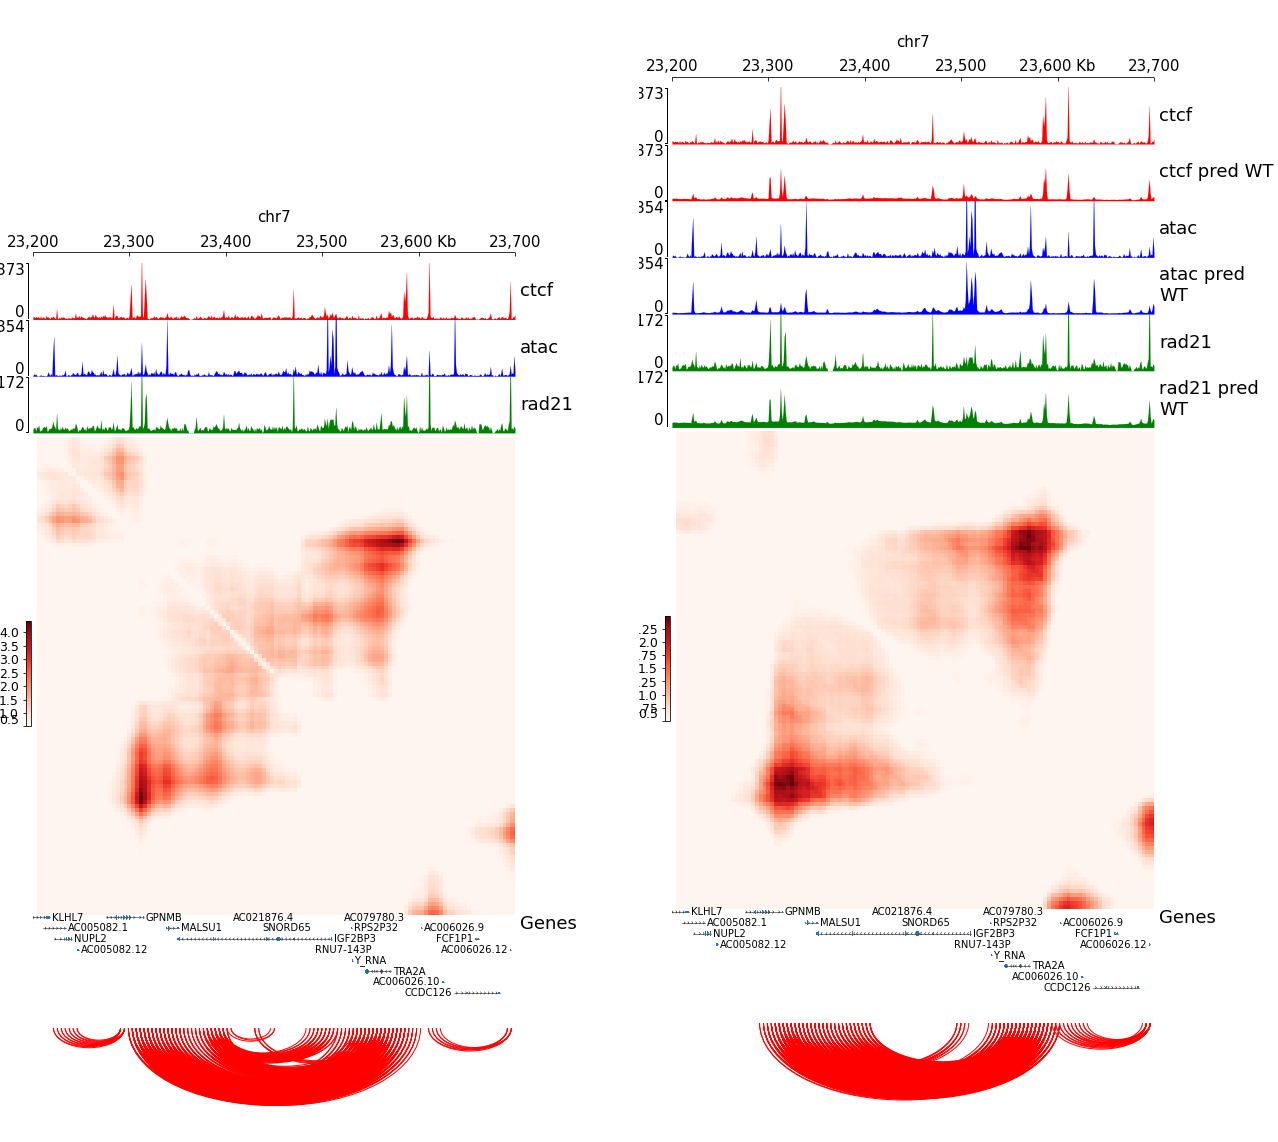

In [112]:
display_images('outputs/baseline_hESC_WT_5kb_norm_chr7_23000000_ctcf_true_tracks.png', 
               'outputs/baseline_hESC_WT_5kb_norm_chr7_23000000_ctcf_pred_tracks.png')

In [113]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname ctcf_ko_only \
    --chr chr3 \
    --start 27274853 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region chr3:27274853-28457152 \
    --ko-start 27274853 \
    --ko-width 2000000 \
    --ko ctcf \
    --ko-mode knockout \
    --peak-height 0.05 \
    --min-val-pred 0.5 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs ctcf atac rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

12270.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:460: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))
/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:460: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))


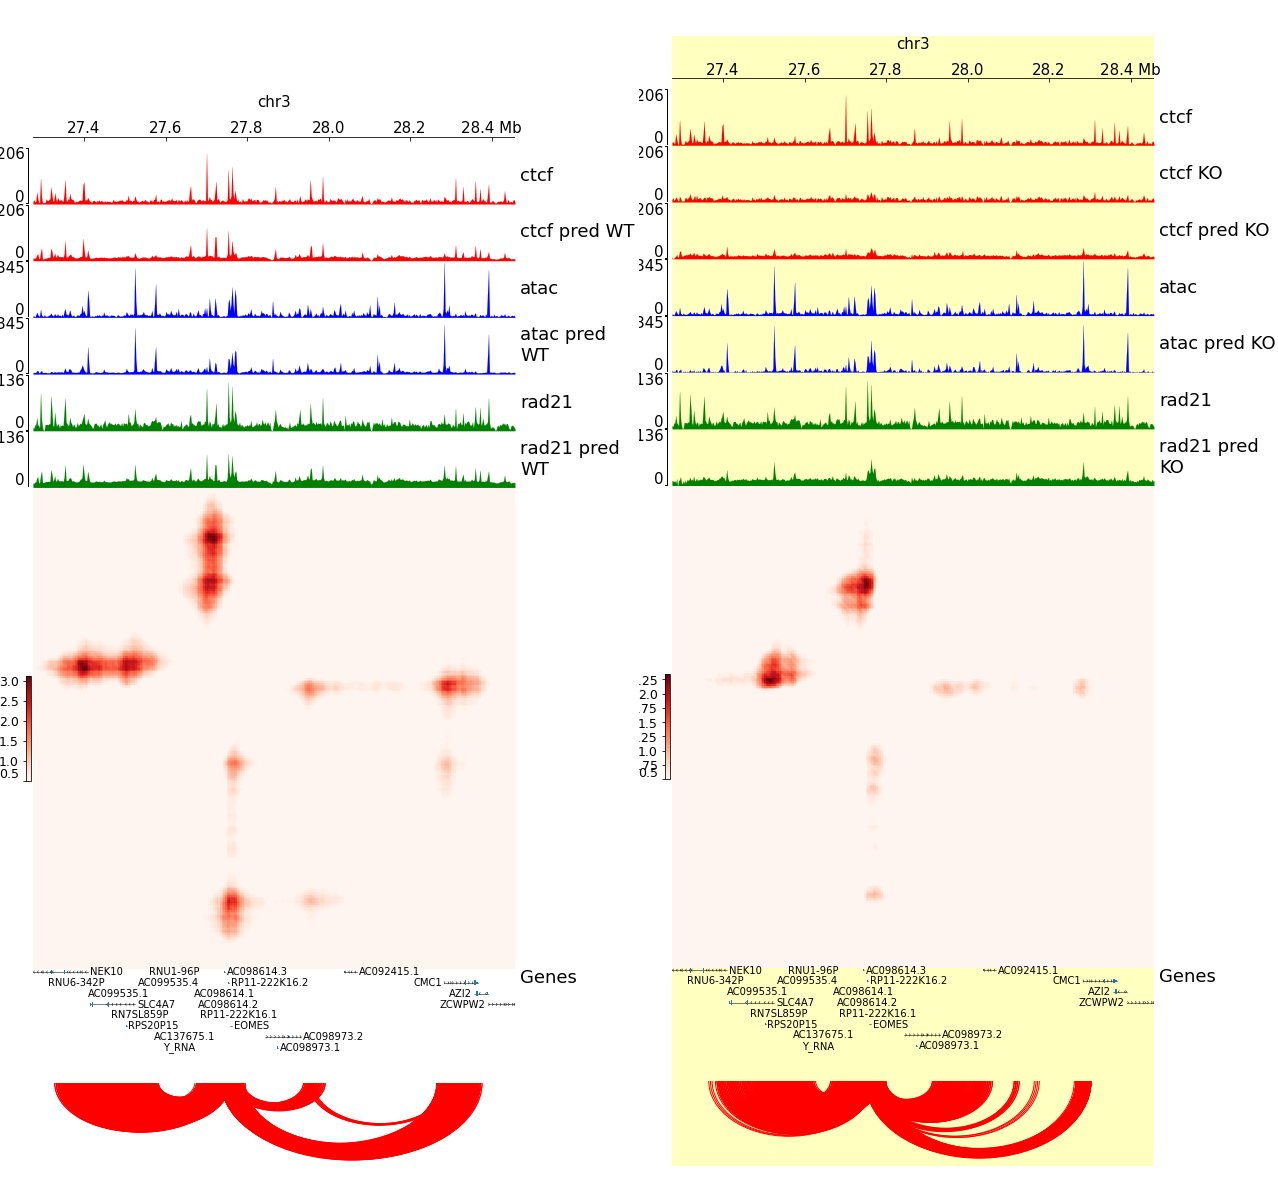

In [114]:
display_images('outputs/ctcf_ko_only_hESC_WT_5kb_norm_chr3_27274853_ctcf_pred_tracks.png', 
               'outputs/ctcf_ko_only_hESC_WT_5kb_norm_chr3_27274853_ctcf_ko_tracks.png')

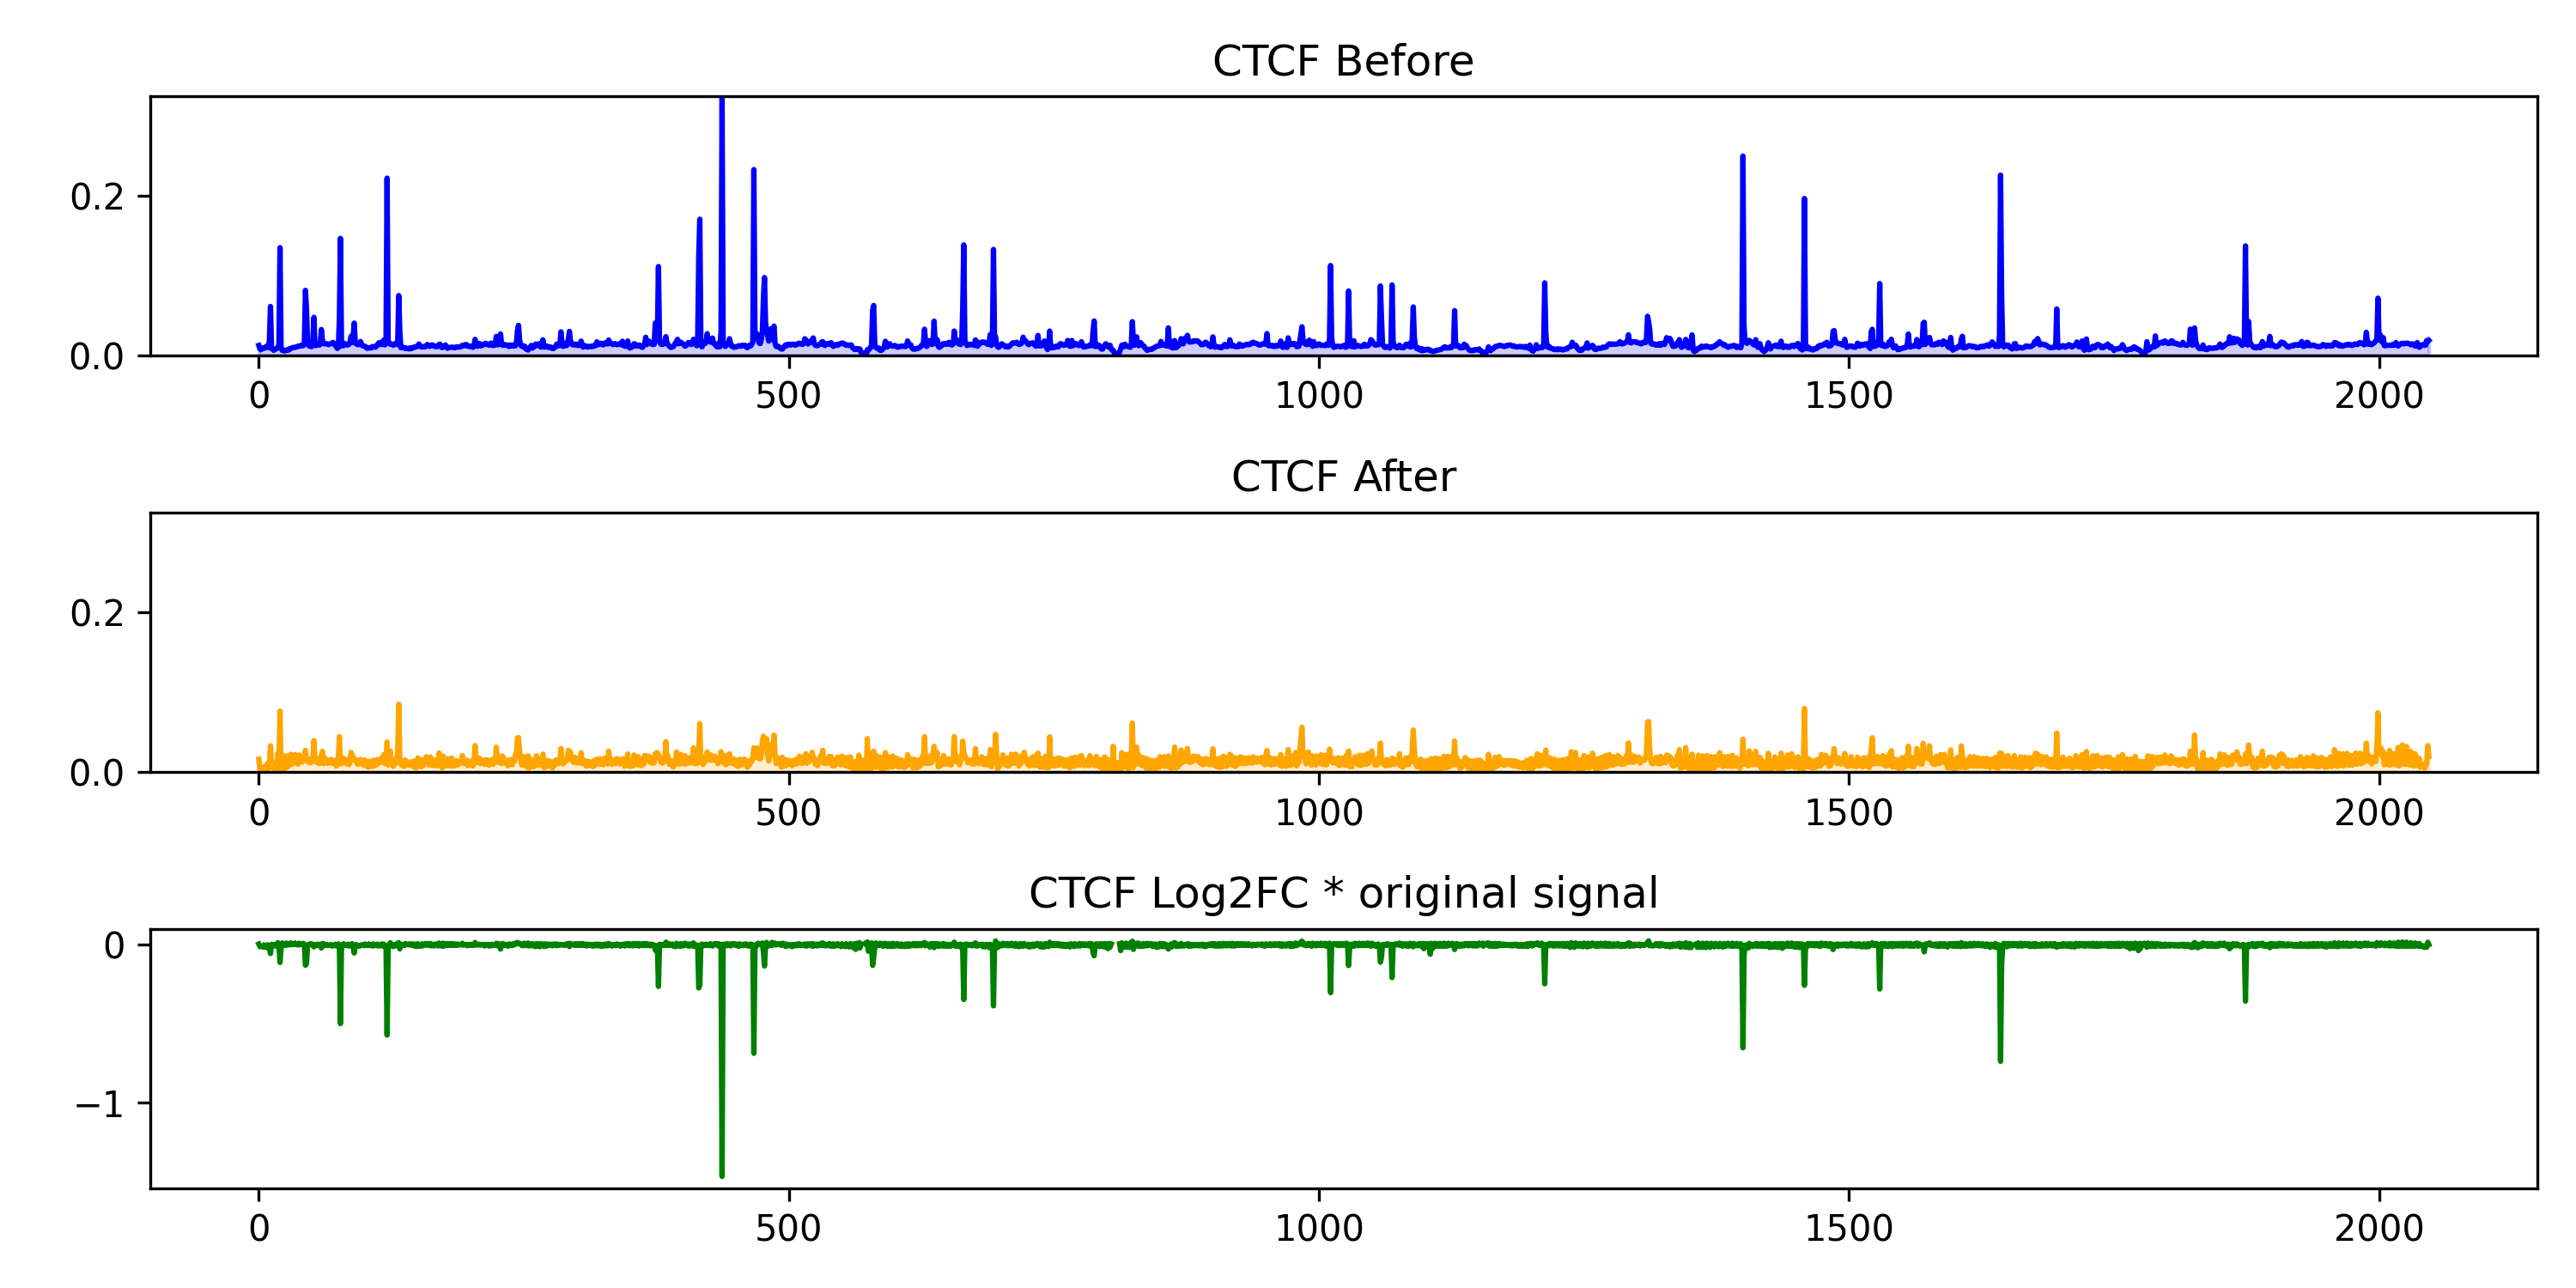

In [115]:
Image(filename='outputs/ctcf_ko_only_hESC_WT_5kb_norm_chr3_27274853_ctcf_log2fc.png', width=1000)

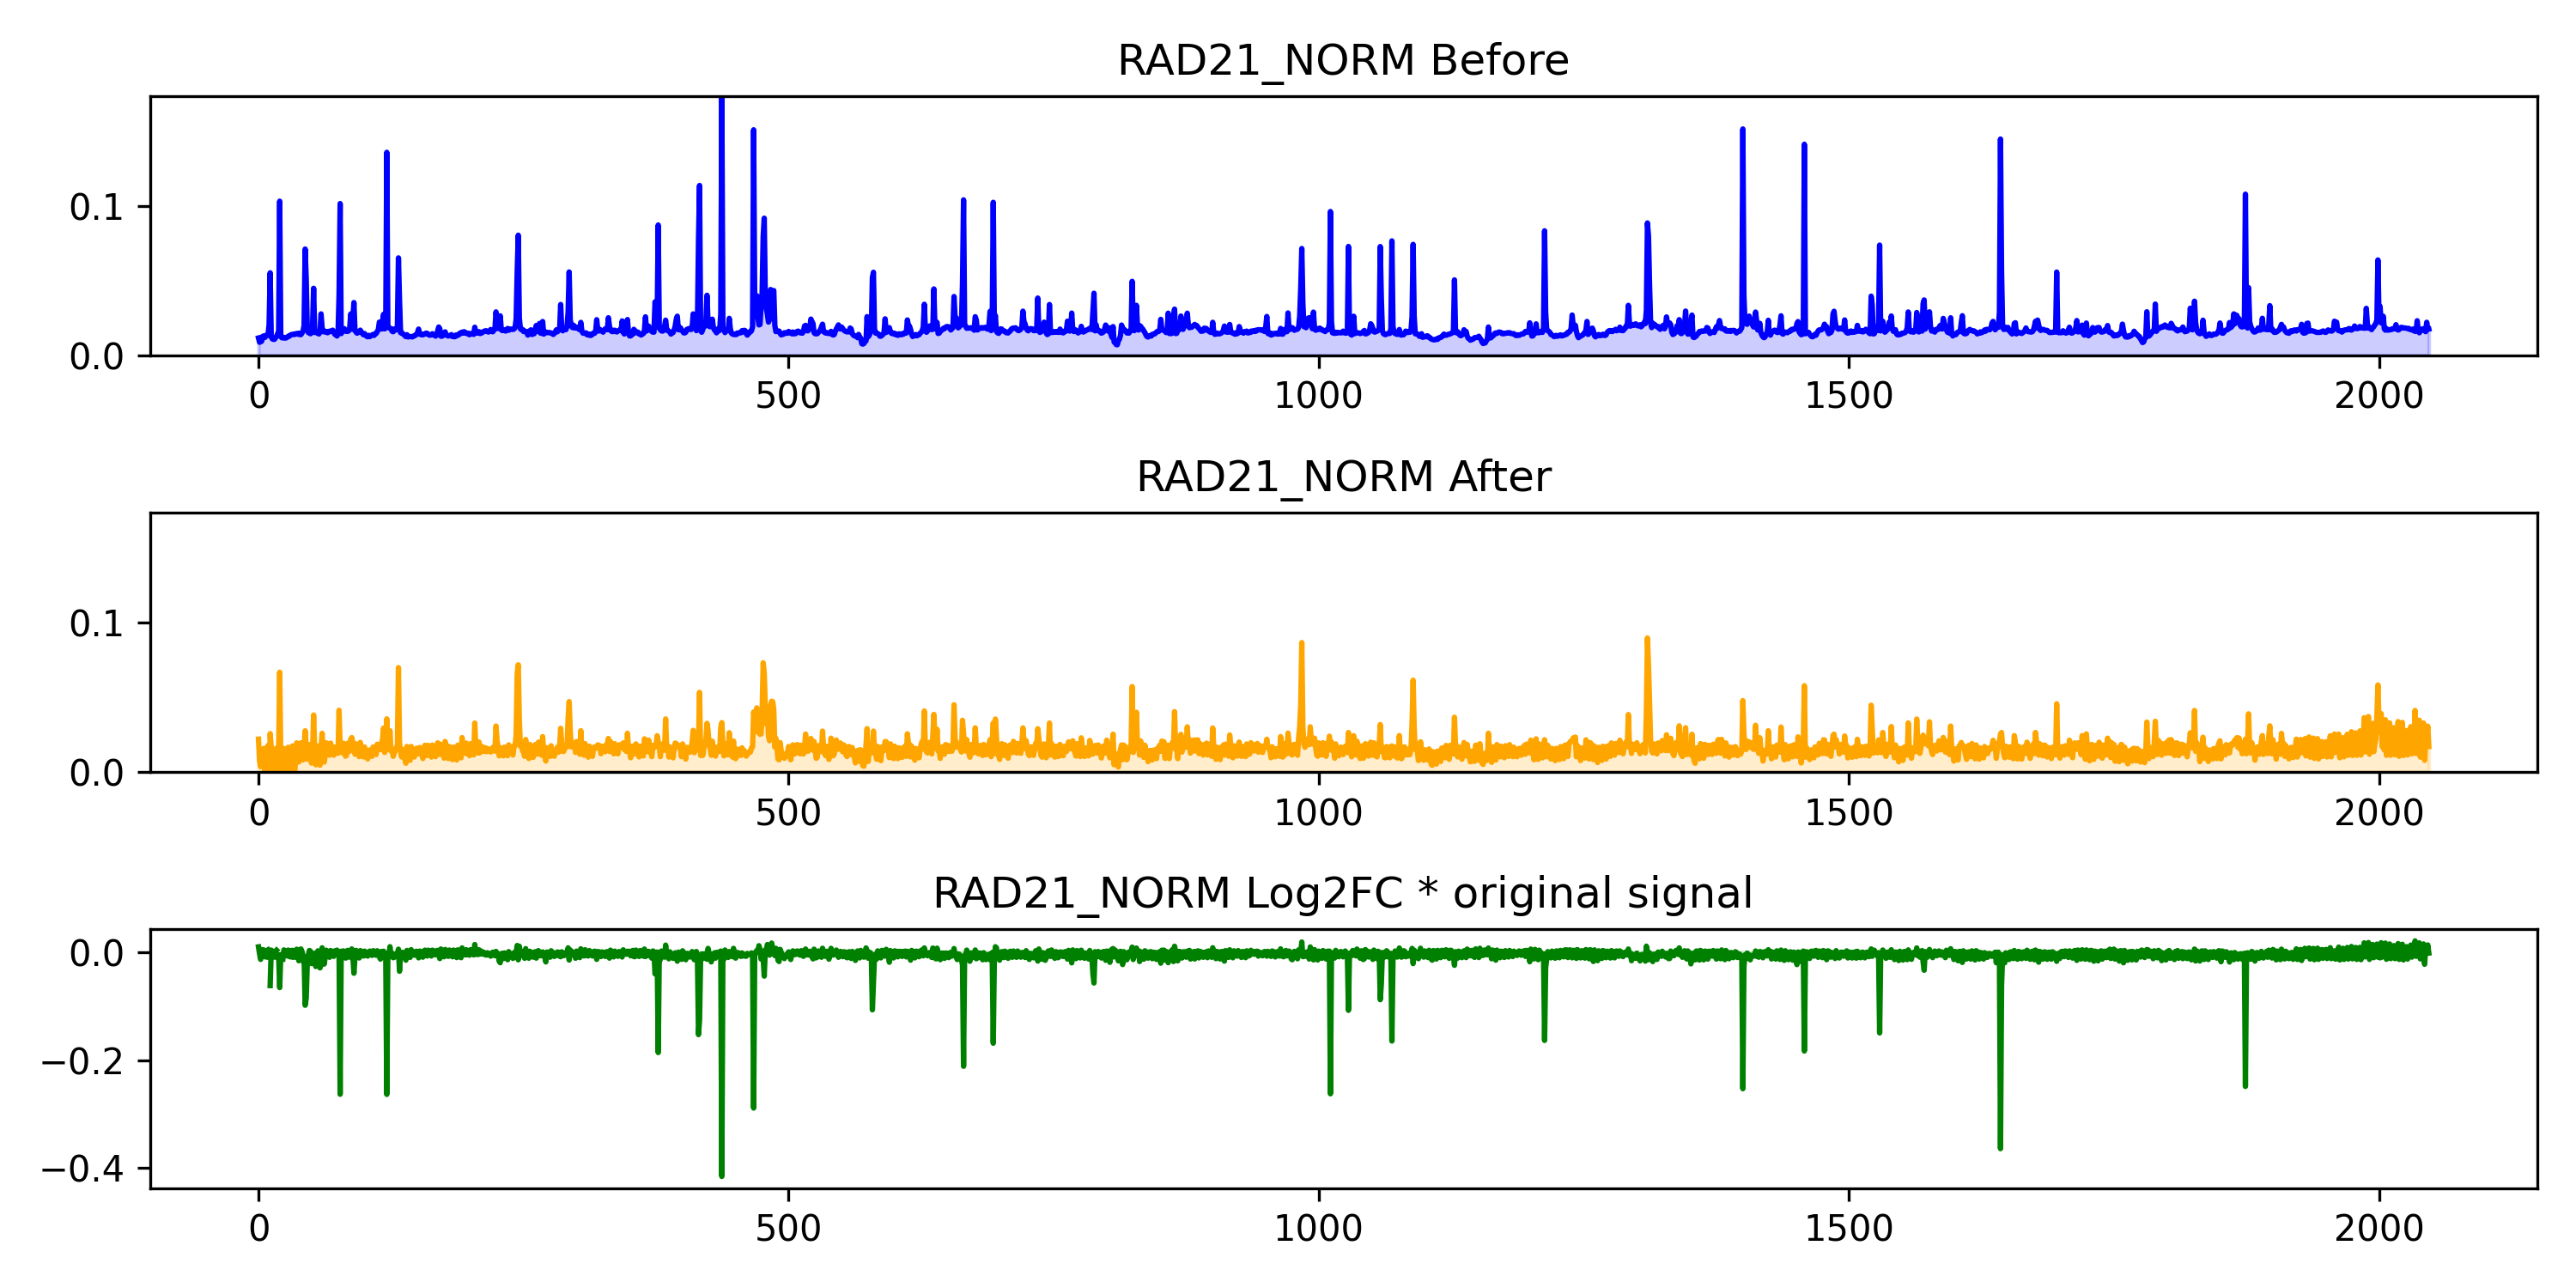

In [116]:
Image(filename='outputs/ctcf_ko_only_hESC_WT_5kb_norm_chr3_27274853_rad21_norm_log2fc.png', width=1000)

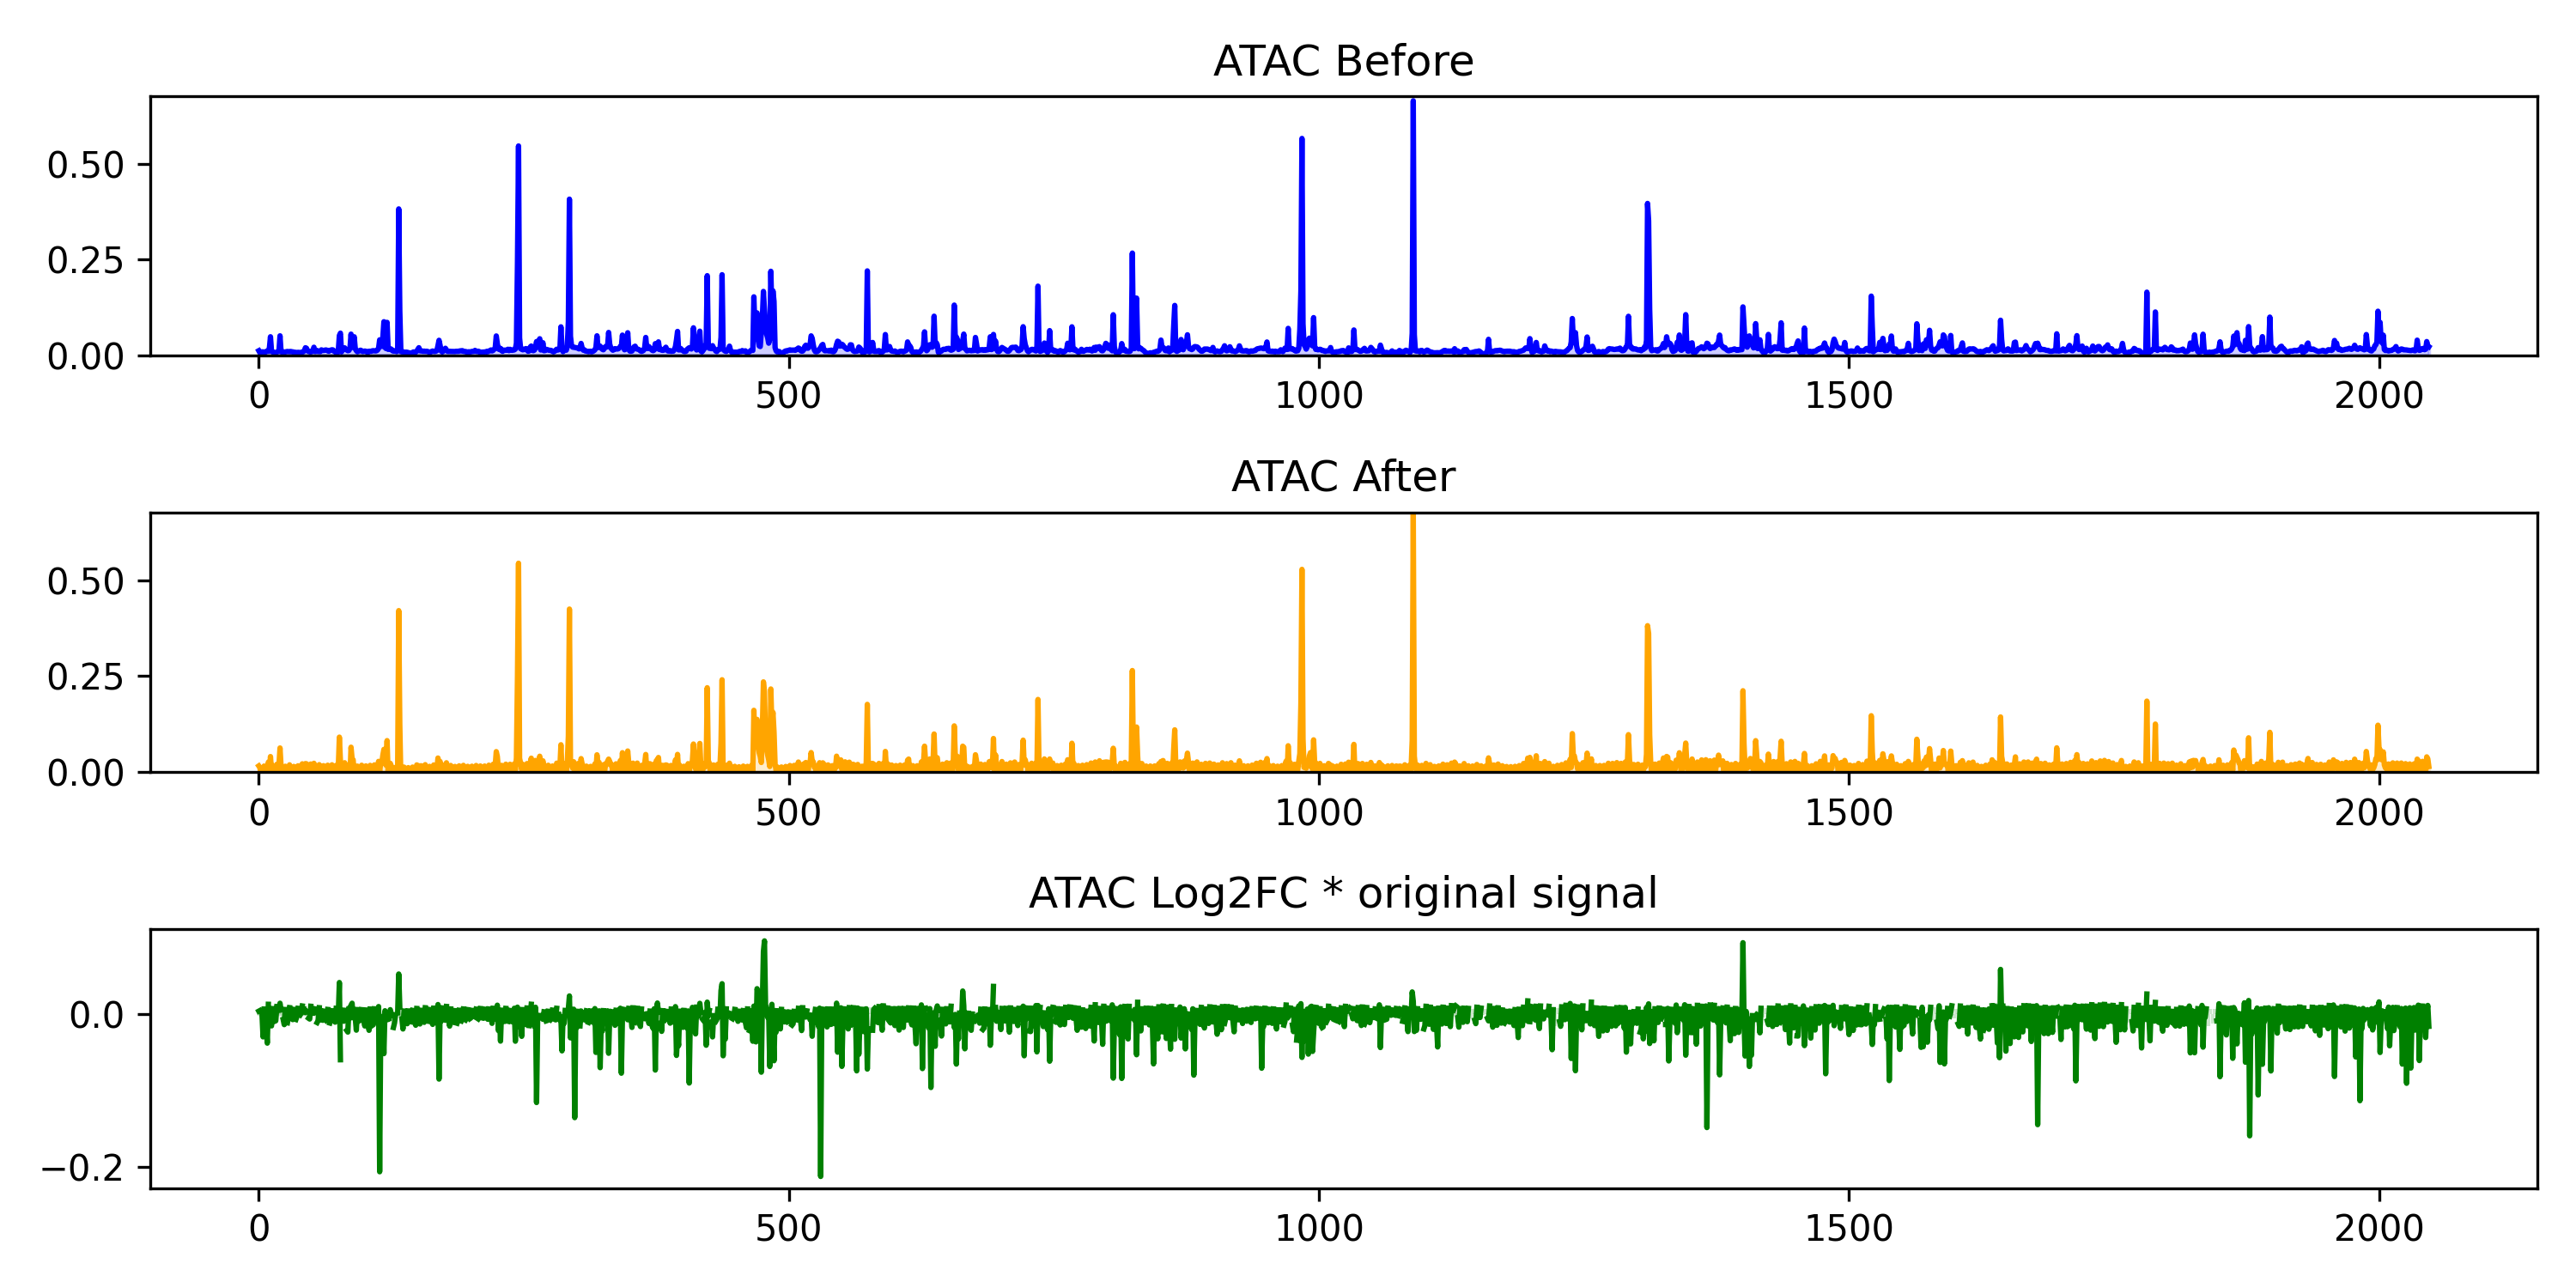

In [117]:
Image(filename='outputs/ctcf_ko_only_hESC_WT_5kb_norm_chr3_27274853_atac_log2fc.png', width=1000)

In [118]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb_norm \
    --outname ctcf_atac_ko \
    --chr chr3 \
    --start 27274853 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks_5kb_norm.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --matrix-size 512 \
    --resolution 4096 \
    --region chr3:27274853-28457152 \
    --ko-start 27274853 27351179 27699356 \
    --ko-width 2000000 50000 25000  \
    --ko atac atac ctcf ctcf \
    --ko-mode knockout \
    --peak-height 0.05 \
    --min-val-pred 0.5 \
    --plot-bigwigs rad21 \
    --plot-pred-bigwigs rad21 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_5kb_norm/genomic_features/atac.bw \
    --silent

12342.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:460: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))
/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:460: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))


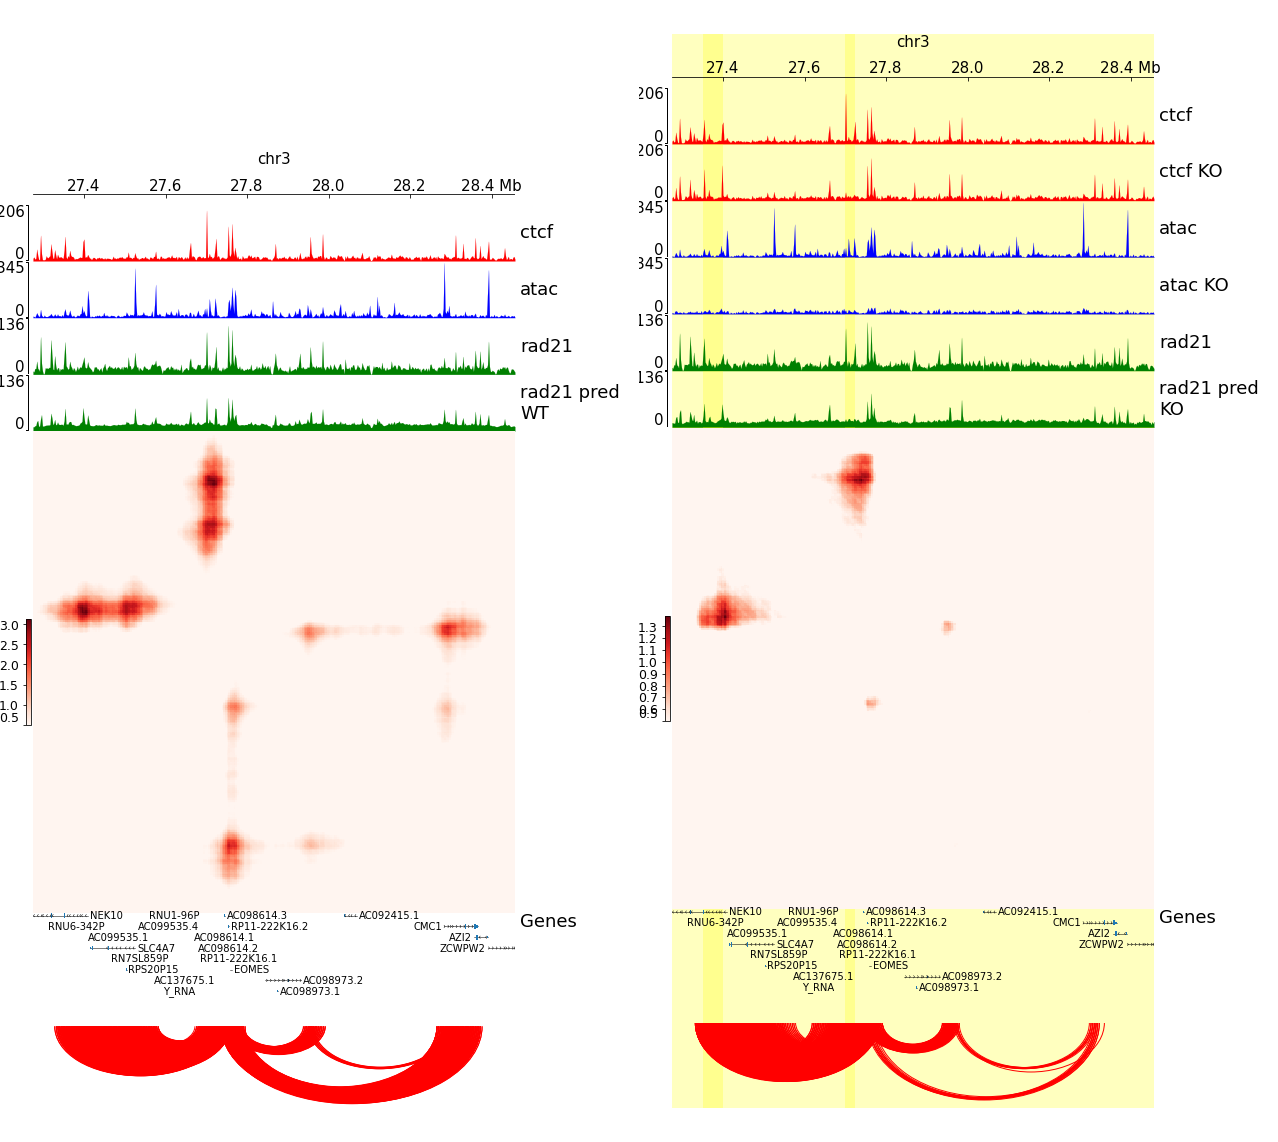

In [119]:
display_images('outputs/ctcf_atac_ko_hESC_WT_5kb_norm_chr3_27274853_ctcf_pred_tracks.png', 
               'outputs/ctcf_atac_ko_hESC_WT_5kb_norm_chr3_27274853_ctcf_ko_tracks.png')

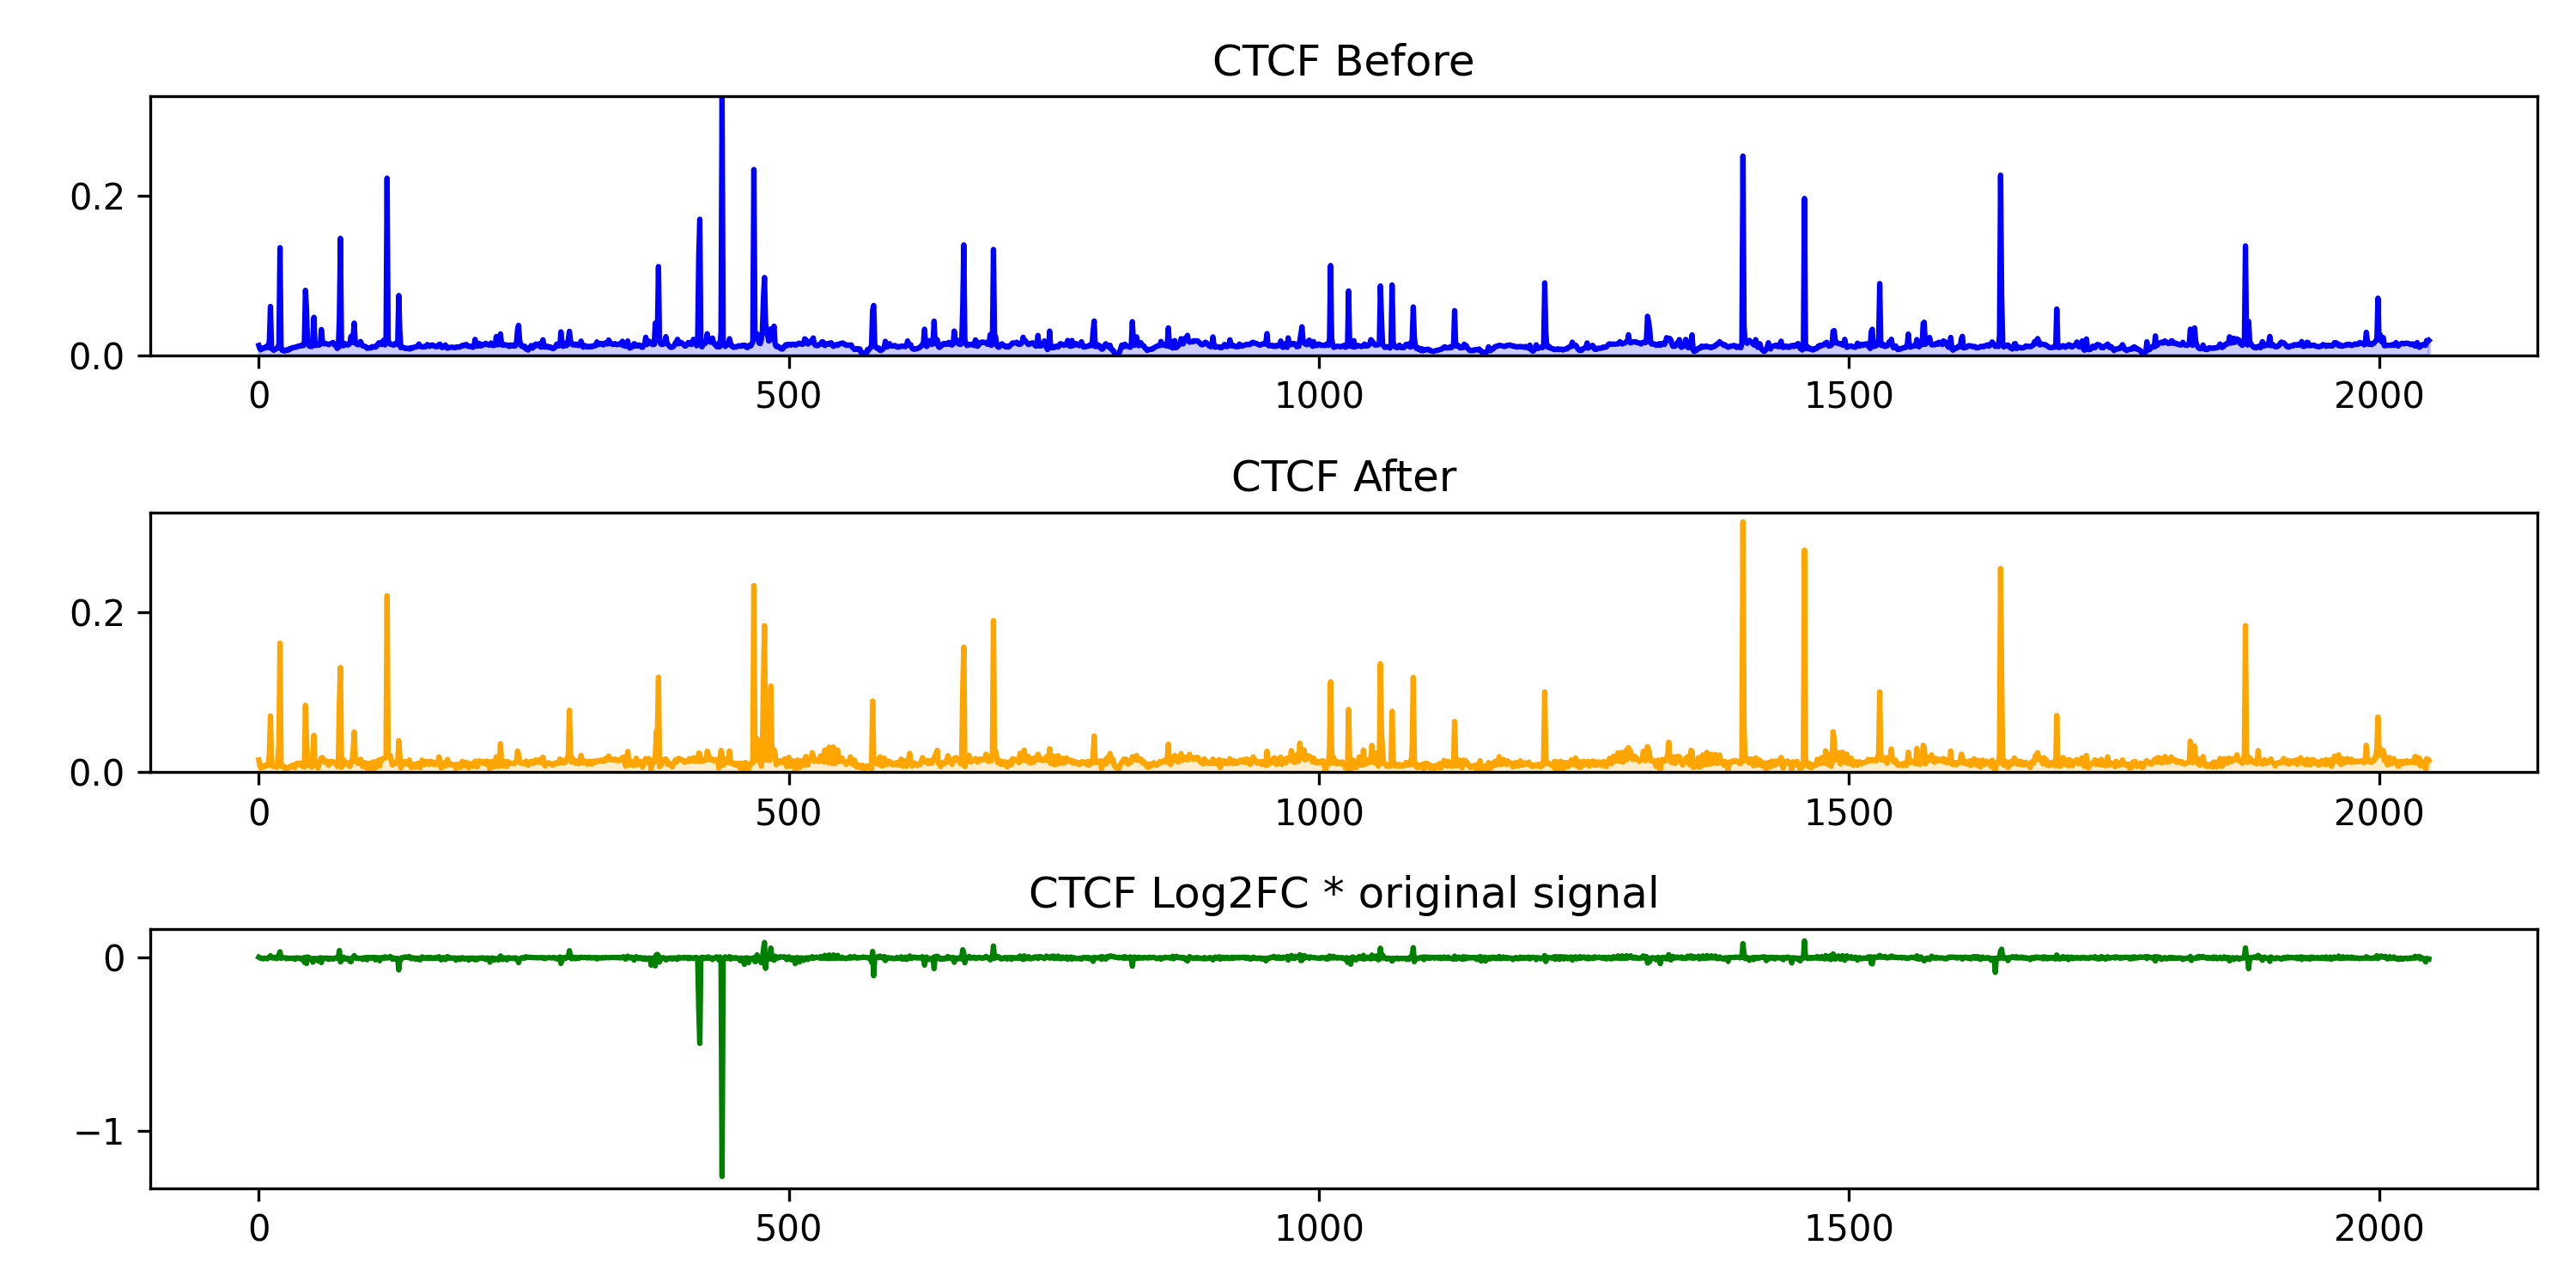

In [120]:
Image(filename='outputs/ctcf_atac_ko_hESC_WT_5kb_chr3_27274853_ctcf_log2fc.png', width=1000)

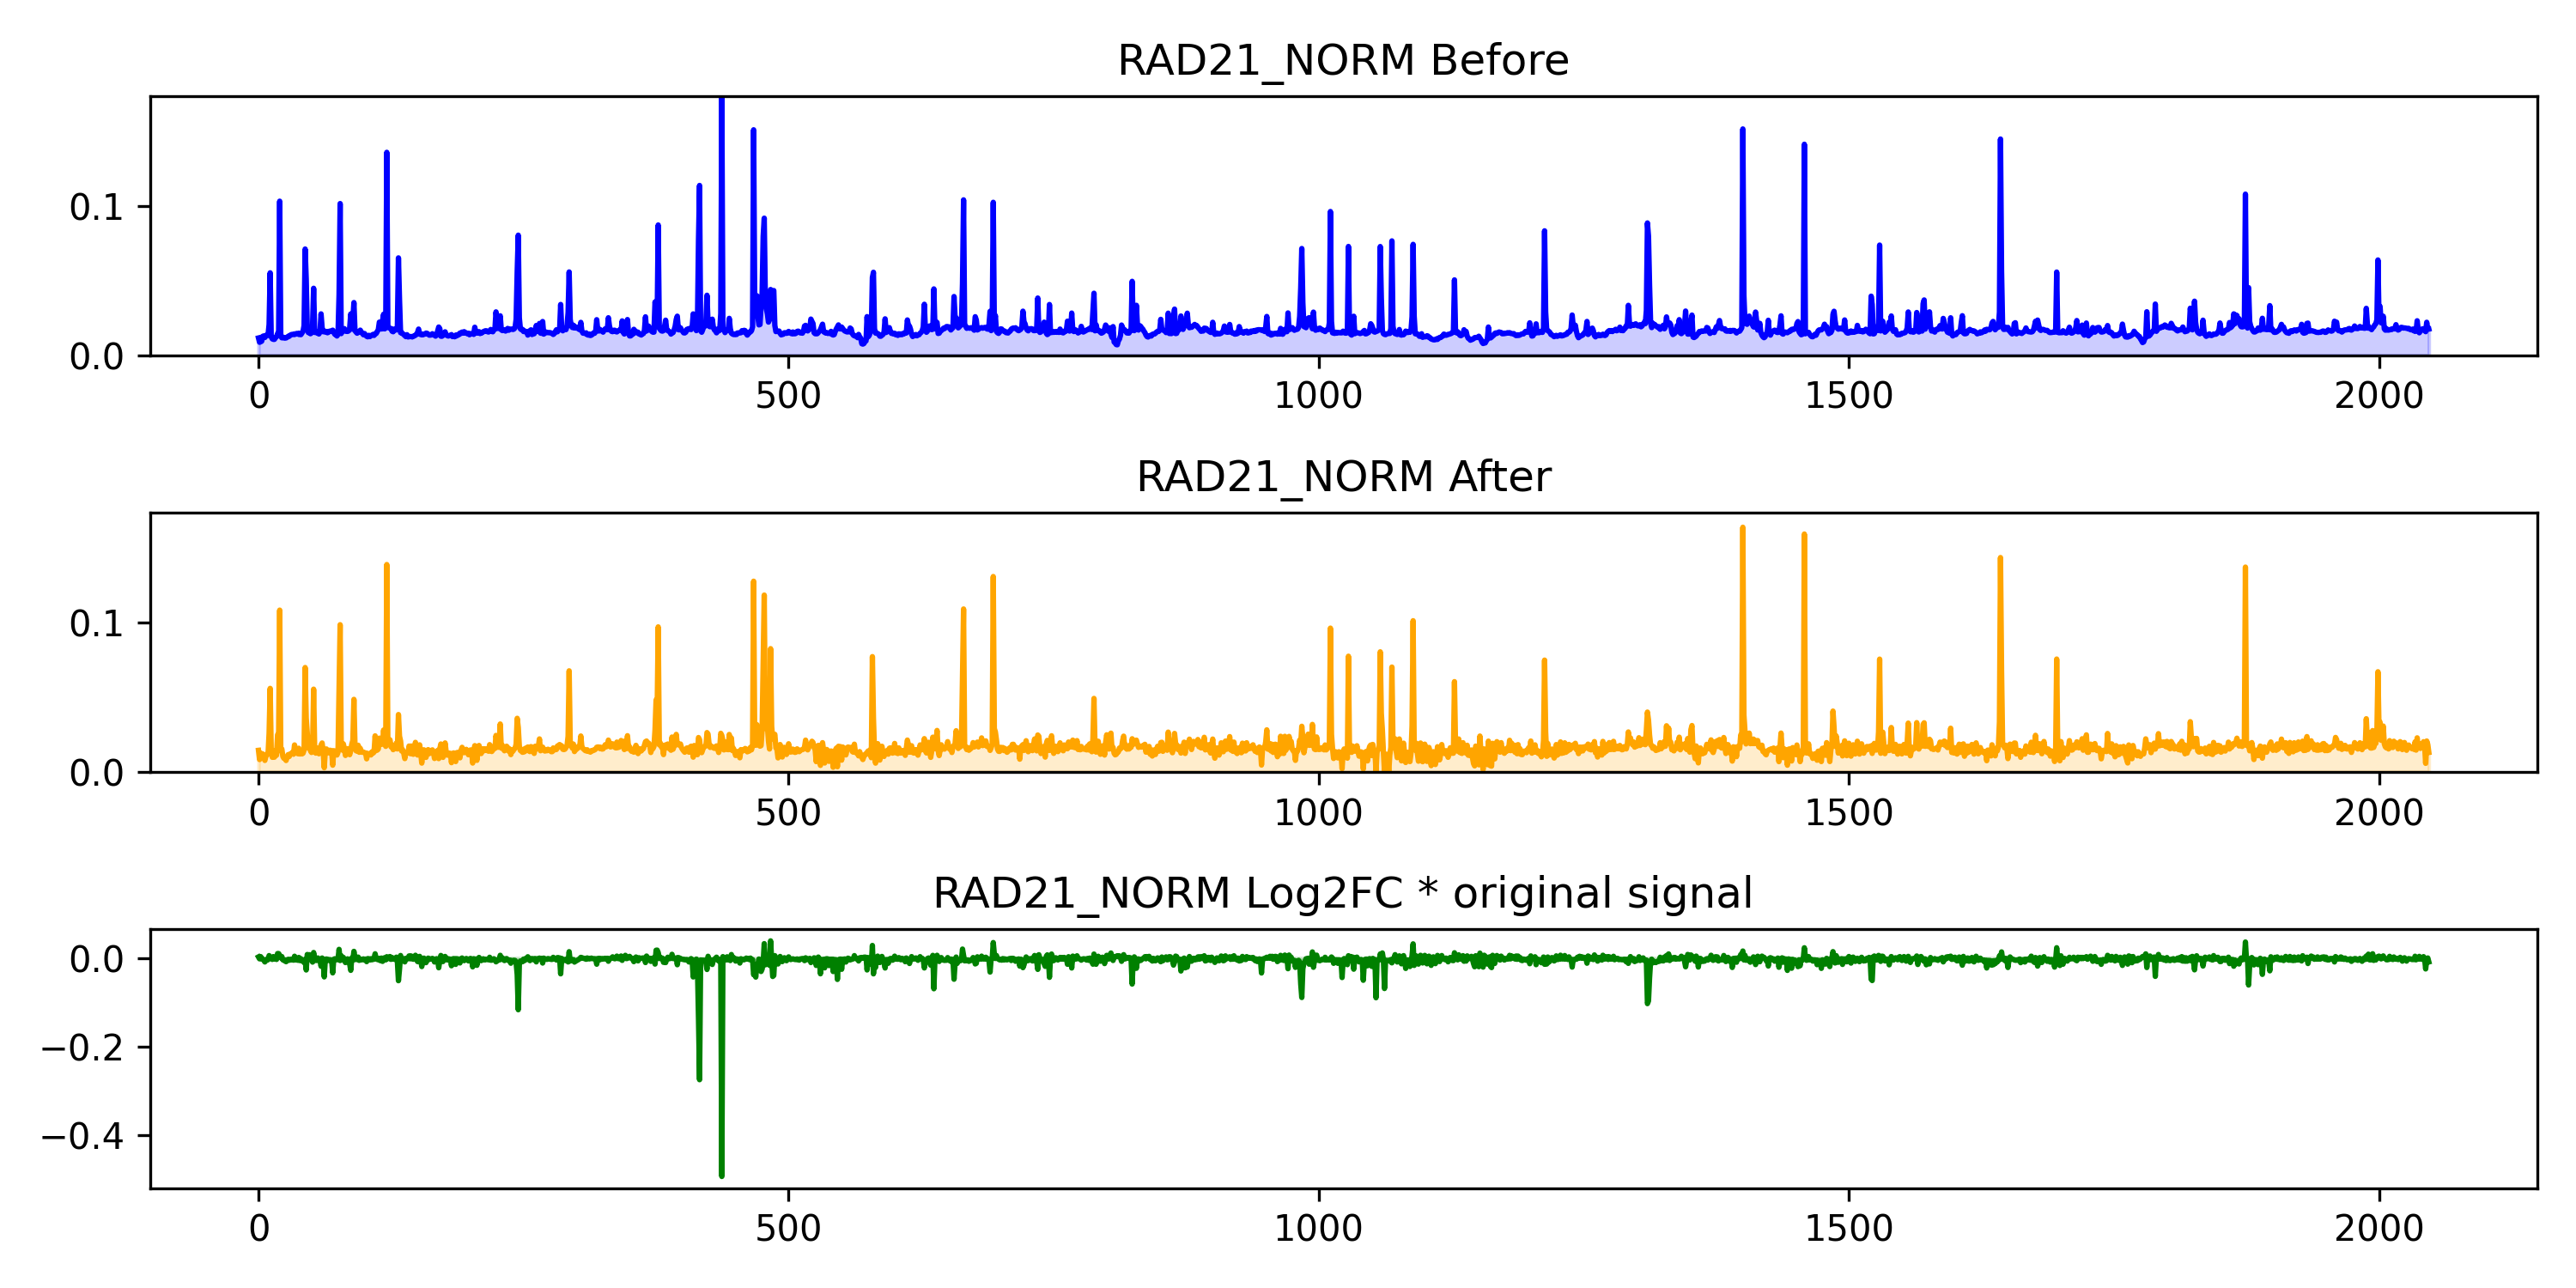

In [121]:
Image(filename='outputs/ctcf_atac_ko_hESC_WT_5kb_chr3_27274853_rad21_norm_log2fc.png', width=1000)

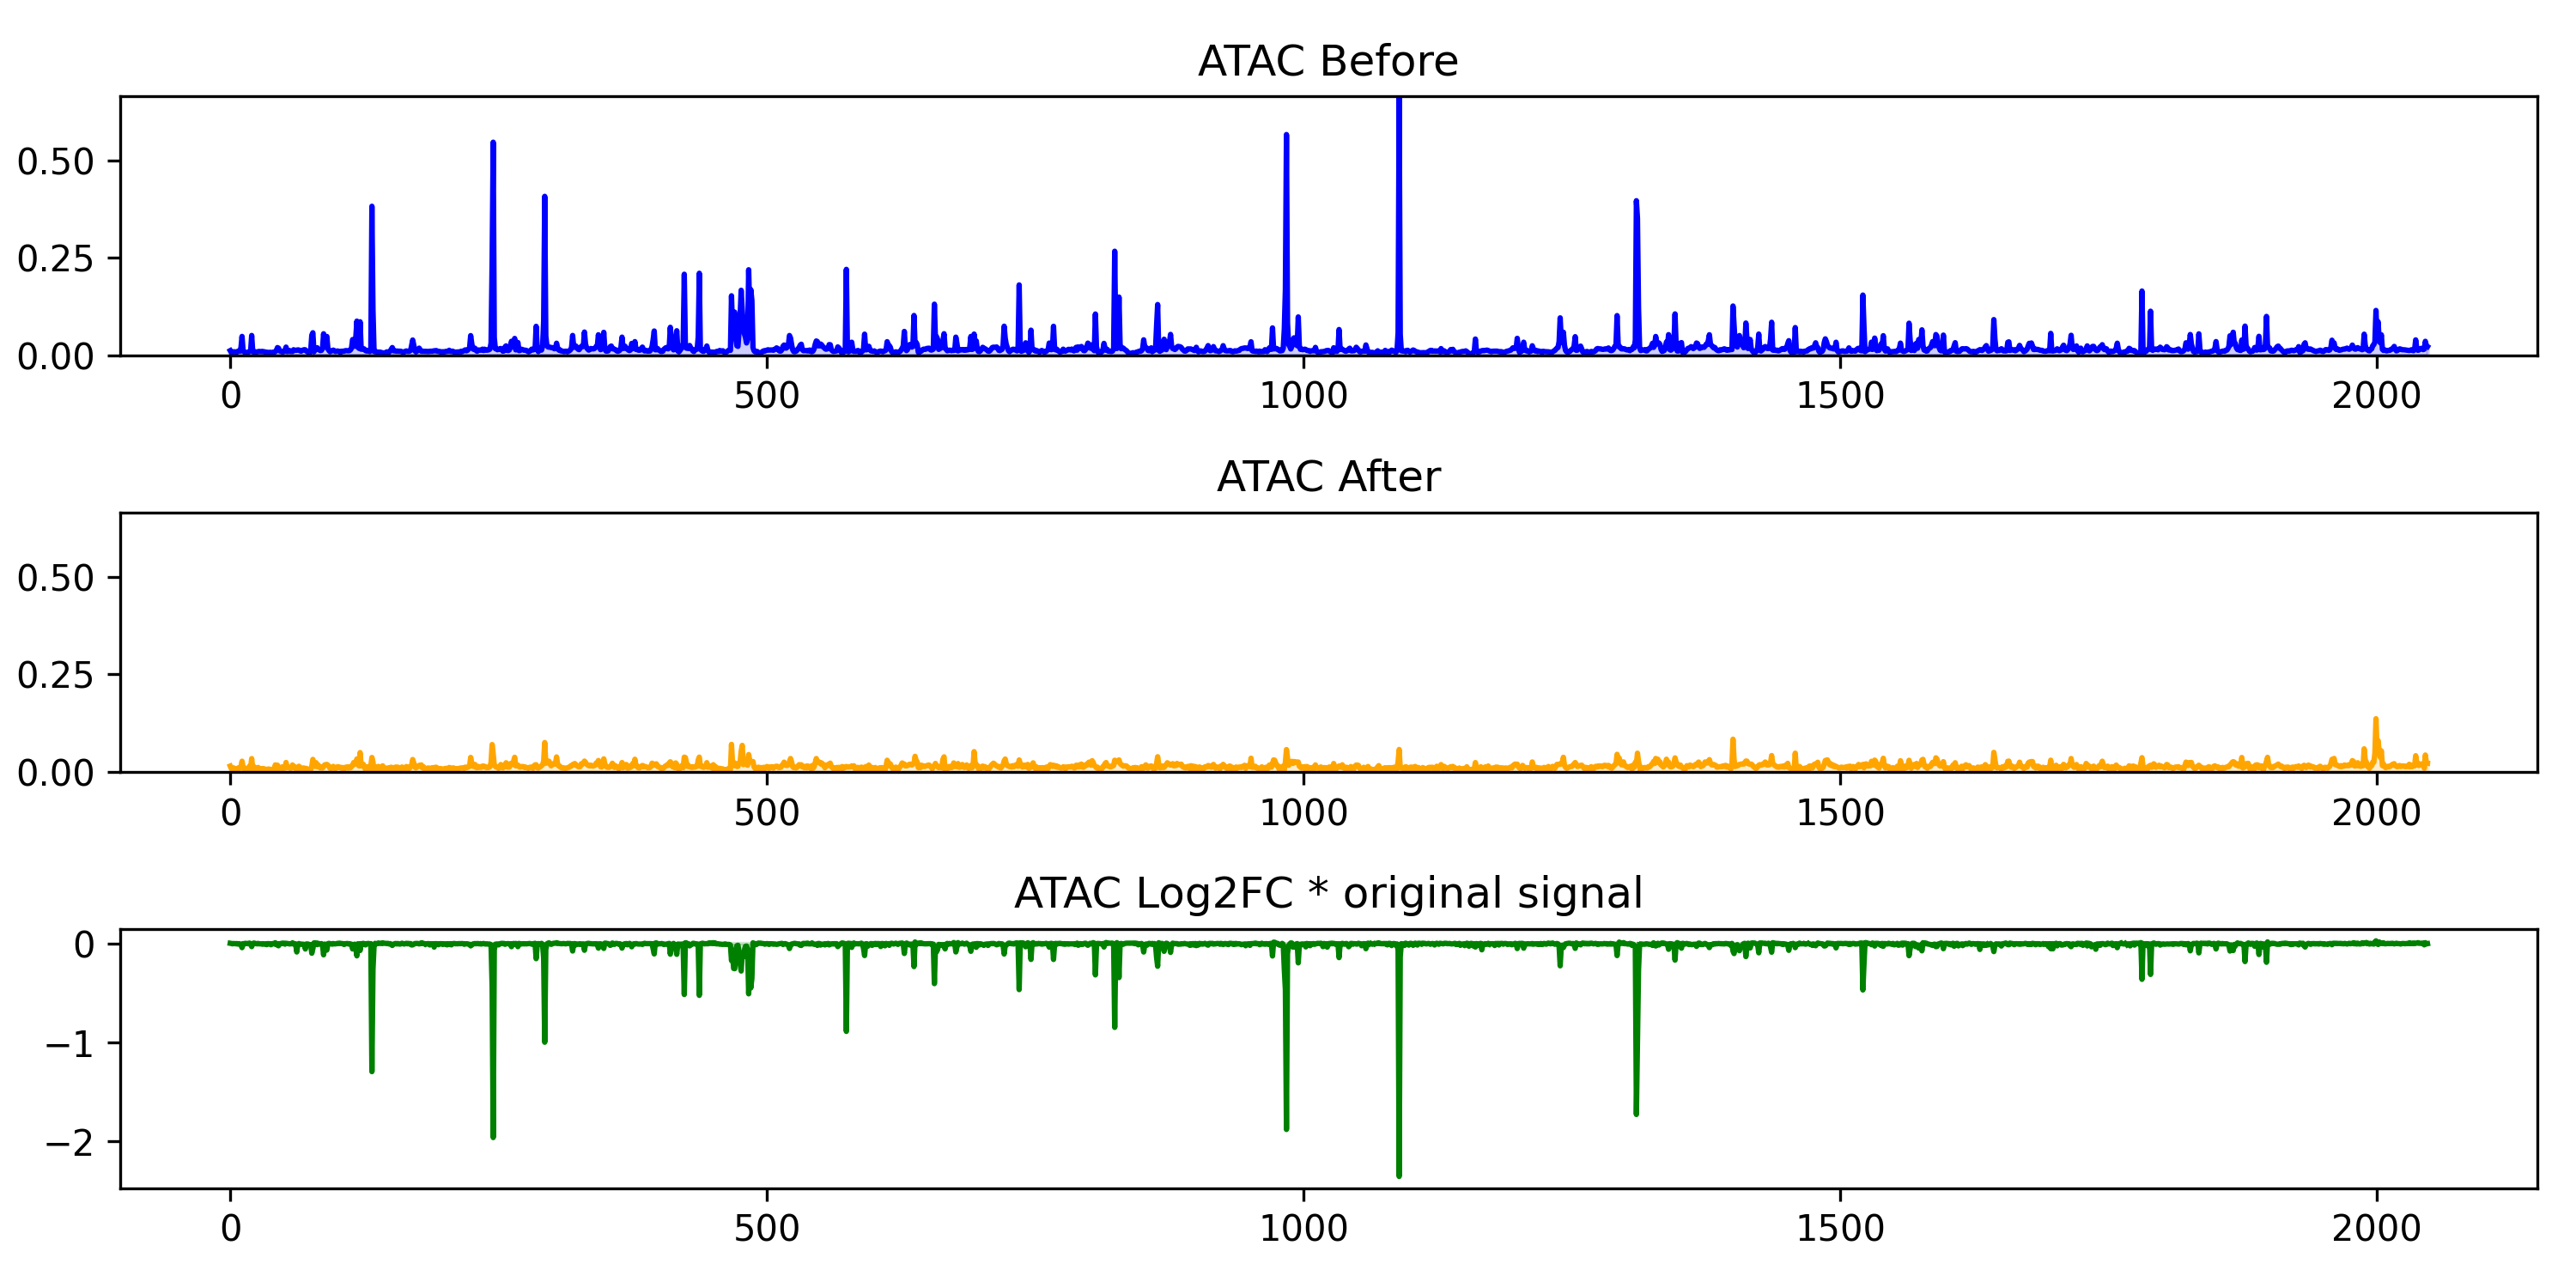

In [122]:
Image(filename='outputs/ctcf_atac_ko_hESC_WT_5kb_chr3_27274853_atac_log2fc.png', width=1000)